In [1]:
import obspy as op
import numpy as np
import cartopy.crs as ccrs
from obspy.clients.fdsn import Client
import cartopy.feature as cfeature
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import datetime





Final Project

In [2]:
currentDT = datetime.datetime.now()
print ('Download initiated.')
print ('Download began: ',str(currentDT))

client = Client("IRIS")
t1 = op.UTCDateTime("1970-01-01T00:00:00")
t2 = op.UTCDateTime("1990-11-05T00:00:00")



#filter out Alaska EQs
minLat = 60
maxLat = 71
minLon = -166
maxLon = -140
minMag = 3
catalog = client.get_events(starttime=t1, endtime=t2, minlatitude=minLat, maxlatitude=maxLat,
minlongitude=minLon, maxlongitude=maxLon, minmagnitude=minMag)


currentDT = datetime.datetime.now()
print ('Download ended: ',str(currentDT))

currentDT = datetime.datetime.now()
print ('Download ended: ',str(currentDT))

count_OK = 0 #initialize counter

print(len(catalog))

lst = []
mags = []

for i in range(0,len(catalog)):
    lat           = catalog[i].origins[0].latitude
    long          = catalog[i].origins[0].longitude
    time          = catalog[i].origins[0].time
    timeDiffInSec = catalog[0].origins[0].time - catalog[i].origins[0].time
    mag           = catalog[i].magnitudes[0].mag
    mags.append(mag)
    #print(i, mag, lat, long, time, timeDiffInSec)
    lst.append(mag)
    #how many earthquakes in OK
    if lat > minLat and lat < maxLat:
        if long > minLon and long < maxLon:
            count_OK +=1 #increase counter for every earthquake
            
print(f'There were {count_OK} earthquakes of magnitude {minMag}+ since 1970')

Download initiated.
Download began:  2022-11-29 15:53:26.221006
Download ended:  2022-11-29 15:53:44.111063
Download ended:  2022-11-29 15:53:44.111277
2992
There were 2989 earthquakes of magnitude 3+ since 1970


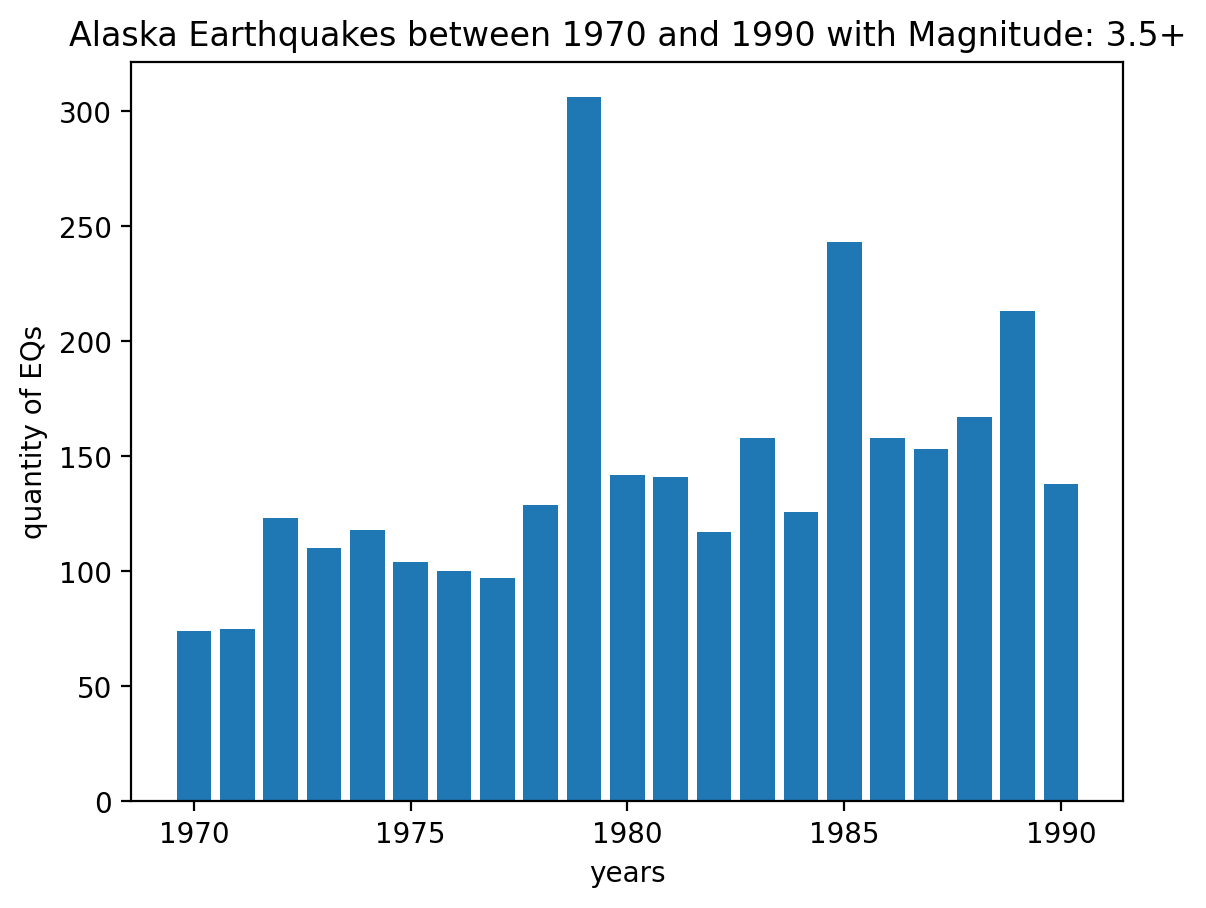

In [3]:

years = np.arange(1970,1991,1)

#array of counters per year
num_EQ = np.zeros(len(years))

# print(years)
# print(num_EQ)

for j in range(0, len(catalog)): #for all EQs in year
    event_year = catalog[j].origins[0].time.year
    index = event_year - 1970
    num_EQ[index] += 1
       
# print(num_EQ)

plt.bar(years, num_EQ)
plt.xlabel('years')
plt.ylabel('quantity of EQs')
plt.title('Alaska Earthquakes between 1970 and 1990 with Magnitude: 3.5+')
plt.show()


In [ ]:
lon_list = np.zeros(len(catalog))
lat_list = np.zeros(len(catalog))


for j in range(0,len(catalog)):
    lon_list[j] = catalog[j].origins[0].longitude
    lat_list[j] = catalog[j].origins[0].latitude


fig = plt.figure(figsize=(50,30))

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([minLon,maxLon,minLat,maxLat], crs=ccrs.PlateCarree())
ax.gridlines()

import cartopy.io.img_tiles as cimgt
request = cimgt.GoogleTiles()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_image(request, 8)

ax.scatter(lon_list, lat_list, c='b',s=400,transform=ccrs.PlateCarree())

plt.show()


In [4]:
len(mags)
import pandas as pd
from collections import Counter
#N = len(mags)
count = Counter(mags)

df = pd.DataFrame.from_dict(count, orient = 'index')
df = df.reset_index()
df = df.sort_values(by = 'index', ascending = True)
#df = df.set_index('index')

#combining values within 0.1 together now
df



index    0
1     3.0  332
12    3.1  212
13    3.2  210
7     3.3  220
2     3.4  205
0     3.5  208
3     3.6  188
9     3.7  201
8     3.8  174
19    3.9  154
6     4.0  130
10    4.1  127
17    4.2   85
4     4.3  106
5     4.4   93
14    4.5   77
11    4.6   64
15    4.7   39
18    4.8   37
21    4.9   31
22    5.0   26
20    5.1   21
27    5.2    8
16    5.3    8
23    5.4   10
25    5.5   12
26    5.6    2
24    5.7    5
33    5.8    1
32    5.9    1
30    6.0    1
28    6.1    2
29    6.2    1
31    6.4    1

<AxesSubplot:xlabel='index', ylabel='0'>

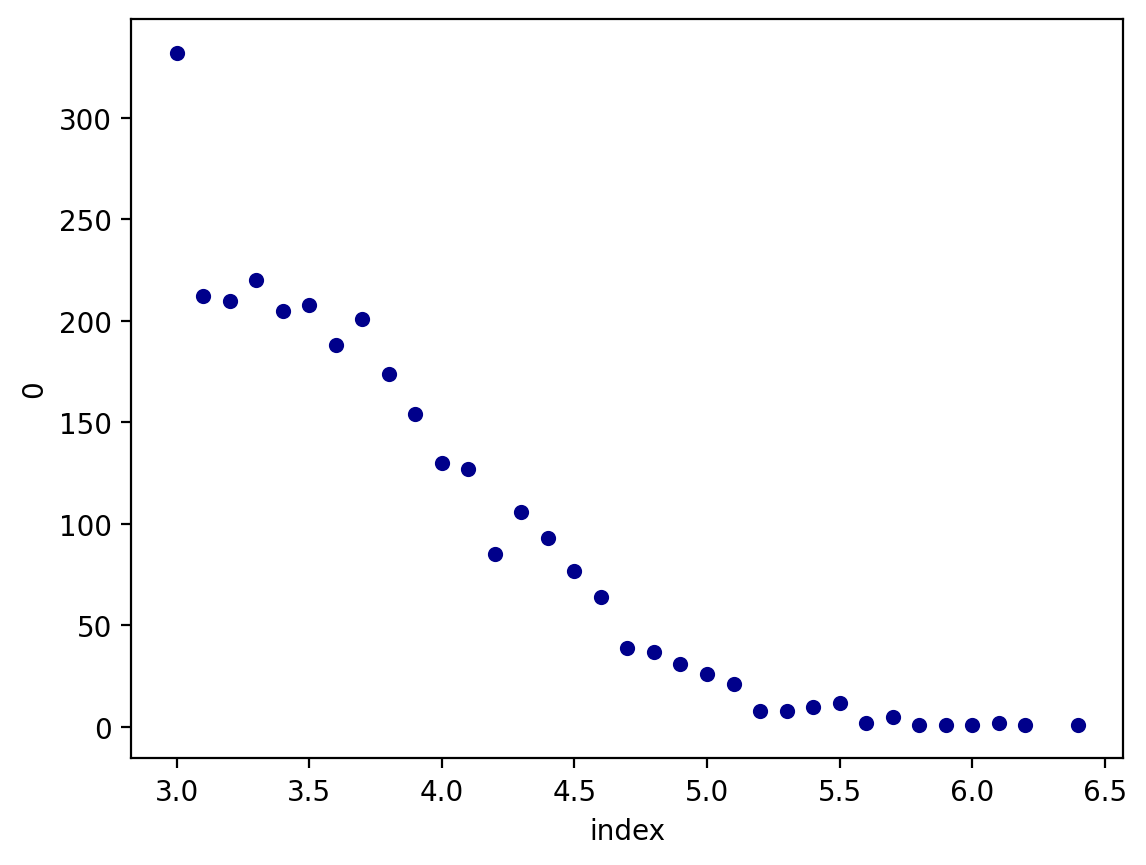

In [5]:
df.plot.scatter(x = 'index', y = 0, c = 'DarkBlue')

In [6]:

valz = df[0].values 
valz = valz / sum(valz)
valz
df['freq'] = valz
df

index    0      freq
1     3.0  332  0.110963
12    3.1  212  0.070856
13    3.2  210  0.070187
7     3.3  220  0.073529
2     3.4  205  0.068516
0     3.5  208  0.069519
3     3.6  188  0.062834
9     3.7  201  0.067179
8     3.8  174  0.058155
19    3.9  154  0.051471
6     4.0  130  0.043449
10    4.1  127  0.042447
17    4.2   85  0.028409
4     4.3  106  0.035428
5     4.4   93  0.031083
14    4.5   77  0.025735
11    4.6   64  0.021390
15    4.7   39  0.013035
18    4.8   37  0.012366
21    4.9   31  0.010361
22    5.0   26  0.008690
20    5.1   21  0.007019
27    5.2    8  0.002674
16    5.3    8  0.002674
23    5.4   10  0.003342
25    5.5   12  0.004011
26    5.6    2  0.000668
24    5.7    5  0.001671
33    5.8    1  0.000334
32    5.9    1  0.000334
30    6.0    1  0.000334
28    6.1    2  0.000668
29    6.2    1  0.000334
31    6.4    1  0.000334

<AxesSubplot:xlabel='index', ylabel='freq'>

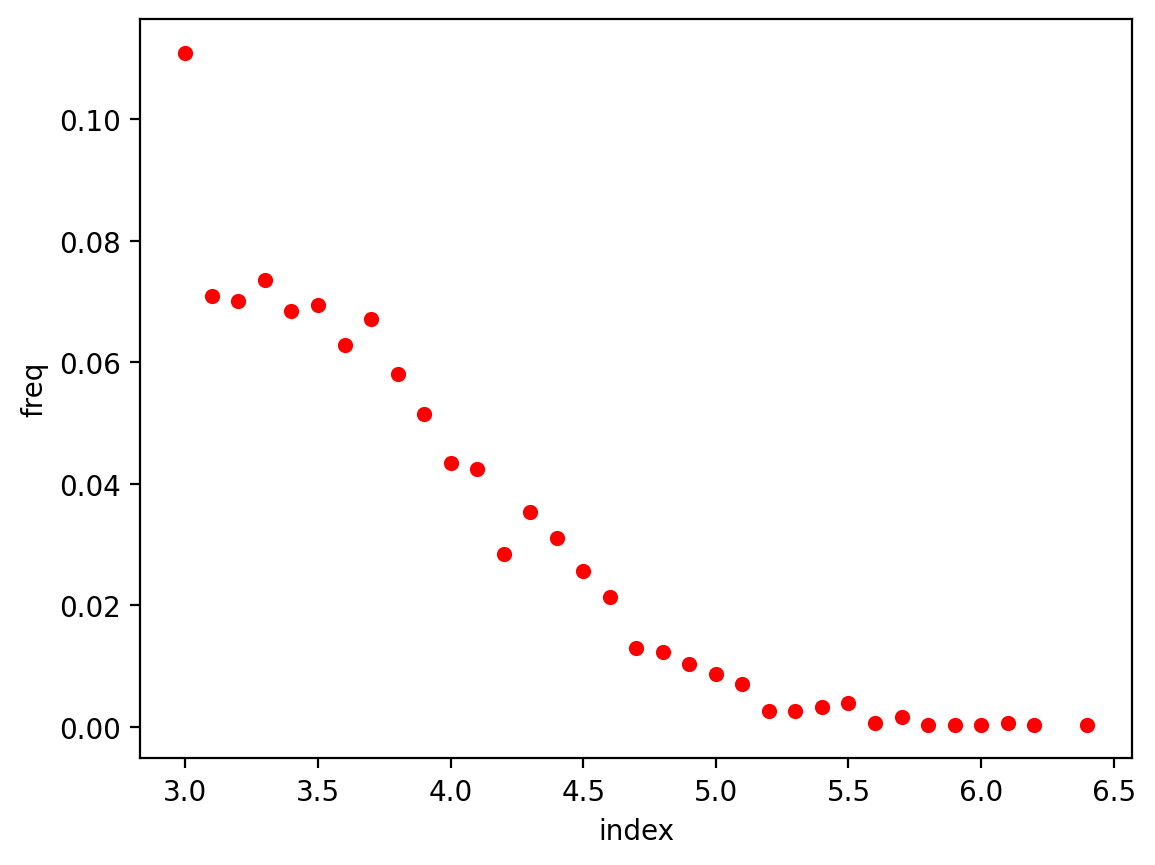

In [7]:
df.plot.scatter(x = 'index', y = 'freq', c = 'red')

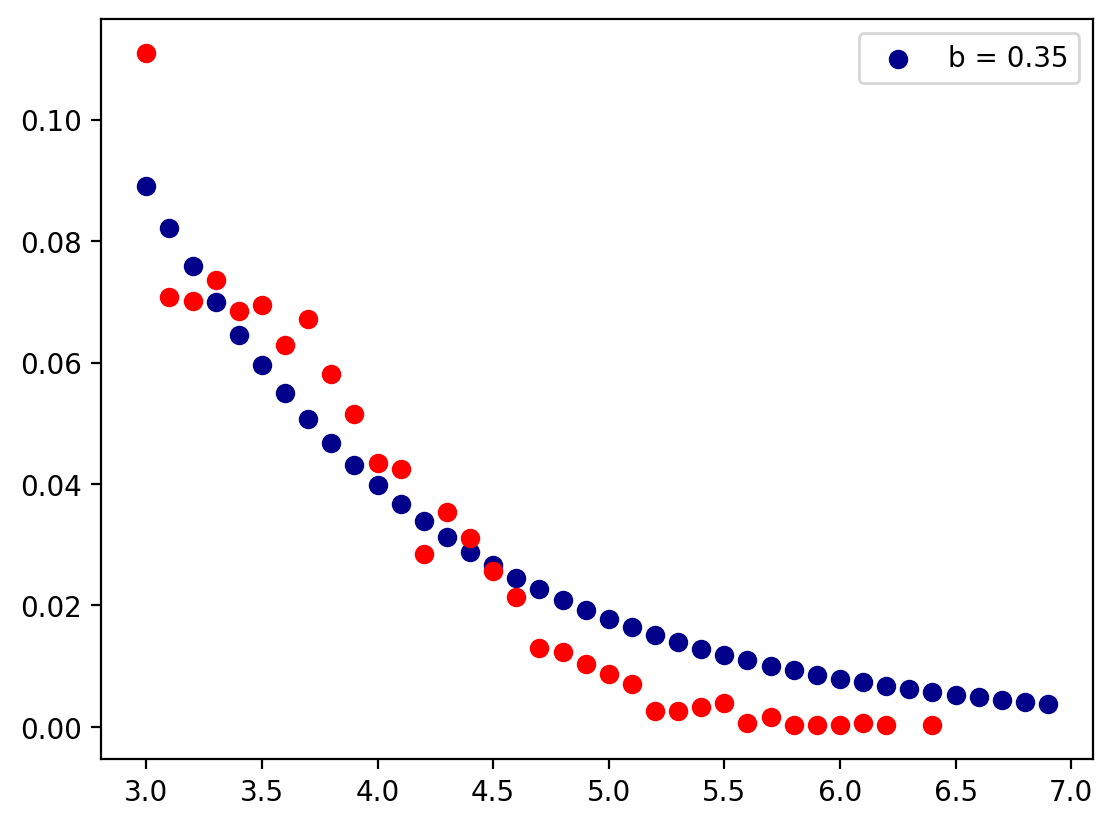

In [8]:
m = np.arange(minMag, 7.0, 0.1)
b = 0.35
a = 10

Ntot = 10 ** a
N = Ntot * 10 ** (-1 * b * m)

N/Ntot

plt.scatter(x = m, y = N/Ntot, c = 'DarkBlue', label = 'b = ' + str(b))
plt.scatter(x = df['index'], y = df['freq'], c = 'red')
plt.legend()

0.05


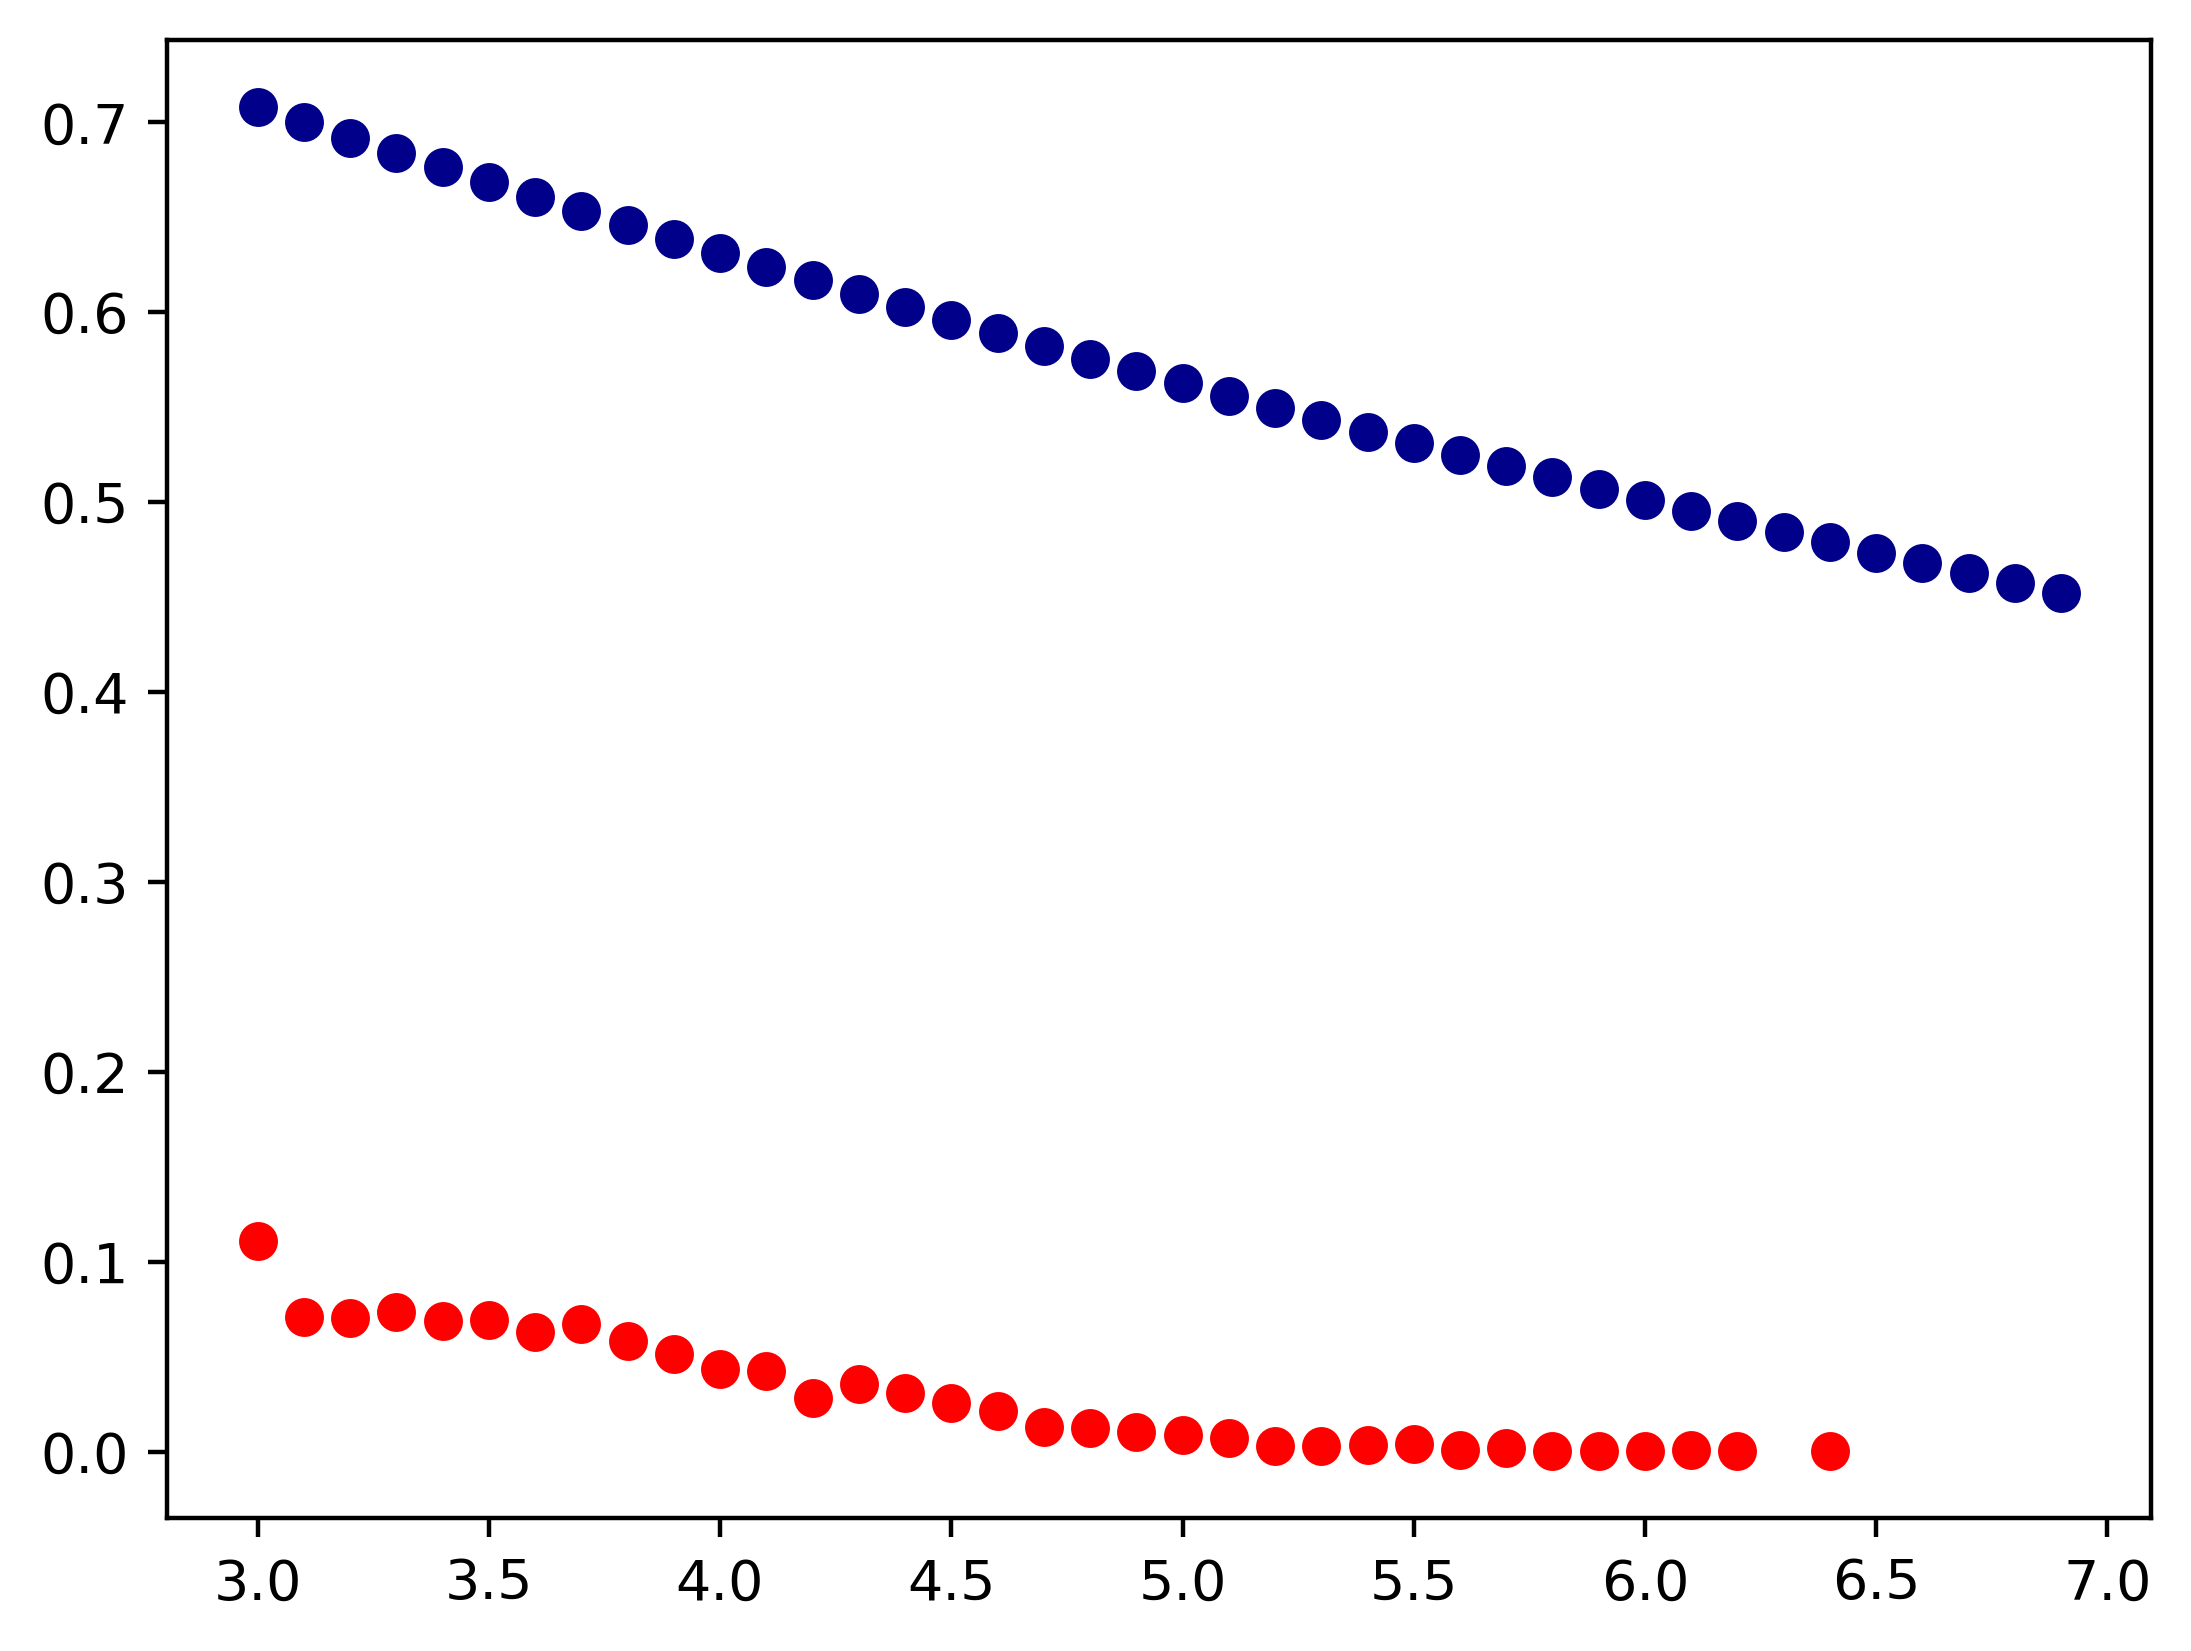

0.1


<Figure size 640x480 with 0 Axes>

0.15000000000000002


<Figure size 640x480 with 0 Axes>

0.2


<Figure size 640x480 with 0 Axes>

0.25


<Figure size 640x480 with 0 Axes>

0.3


<Figure size 640x480 with 0 Axes>

0.35000000000000003


<Figure size 640x480 with 0 Axes>

0.4


<Figure size 640x480 with 0 Axes>

0.45


<Figure size 640x480 with 0 Axes>

0.5


<Figure size 640x480 with 0 Axes>

0.55


<Figure size 640x480 with 0 Axes>

0.6000000000000001


<Figure size 640x480 with 0 Axes>

0.6500000000000001


<Figure size 640x480 with 0 Axes>

0.7000000000000001


<Figure size 640x480 with 0 Axes>

0.7500000000000001


<Figure size 640x480 with 0 Axes>

0.8


<Figure size 640x480 with 0 Axes>

0.8500000000000001


<Figure size 640x480 with 0 Axes>

0.9000000000000001


<Figure size 640x480 with 0 Axes>

0.9500000000000001


<Figure size 640x480 with 0 Axes>

1.0


<Figure size 640x480 with 0 Axes>

Completed


In [9]:
fig = plt.figure(dpi=200)
from matplotlib.animation import FFMpegWriter
metadata = dict(title='My first animation in 2D', artist='Matplotlib',comment='Wakanda is here now.')
writer = FFMpegWriter(fps=15, metadata=metadata,bitrate=200000)



from matplotlib import cm    
with writer.saving(fig, "bCoeff.mp4", dpi = 200):
    for b in np.arange(0.05, 1.05, 0.05):
        m = np.arange(minMag, 7.0, 0.1)
        a = 10

        Ntot = 10 ** a
        N = Ntot * 10 ** (-1 * b * m)

        fig.clear() 
        ax = fig.add_subplot() 
        ax.scatter(x = m, y = N/Ntot, c = 'DarkBlue')
        ax.scatter(x = df['index'], y = df['freq'], c = 'red')
        plt.draw()
        print(b)
        plt.pause(0.5) # choose the time argument between 0.01 and 0.5 
        
        writer.grab_frame()
        #fig.clear() 
    print("Completed")